**Observable Trends**
1.	In accordance with the data generated from 500+ cities of varying distance from the equator, temperatures are strongly influenced by changes in latitude. This observation is illustrated by the ‘City Latitude vs Max Temperature’ scatter plot, and both the ‘Northern and Southern Hemisphere – Max Temp vs. Latitude Linear Regressions’.   In the illustrations, temperatures for the various cities are higher at or around the equator (0 degrees Latitude). As we move (+) or (-) in relation to the equator, temperatures increase or decrease accordingly. A strong correlation is evident based on the Linear Regression models.   

2.	Although a strong correlation is observed between temperature and a city’s latitude, the same cannot be said for the relationship between the remaining parameters (Humidity, Cloudiness, and Wind Speed) and a city’s latitude. As evidenced by the generated scatter plots and liner regression models, a weak correlation is demonstrated between the remaining parameters and latitude. Therefore, a theory could be formed that other environmental factors (i.e.: proximity to water and topography) would have a greater influence on these parameters. See Heatmaps from Part II of this assignment.

3.	Although a weak correlation exists between wind speed and a city’s latitude, as represented by the scatter plot and liner regression models for ‘City Latitude vs Wind Speed’, wind speed does show to be slightly lower as a city’s location moves closer to the equator. However, an argument could be made that this observation is null because of the smaller quantity of datapoints in the reference in relation to the rest of the datapoints in the dataframe.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
city_found = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temperature = []
wind_speed = []
city_count = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
                    
        response = requests.get(query_url + city).json()

        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        
        city_found.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temperature.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        
        city_count = city_count + 1
        
        print(f"Processing Record {city_count} of set 1 | " + city)
    
    except:
        print("Error: " + city)

Processing Record 1 of set 1 | faanui
Processing Record 2 of set 1 | ulagan
Processing Record 3 of set 1 | awbari
Processing Record 4 of set 1 | hilo
Processing Record 5 of set 1 | talnakh
Error: louisbourg
Processing Record 6 of set 1 | barrow
Processing Record 7 of set 1 | busselton
Processing Record 8 of set 1 | ushuaia
Error: ndiekro
Processing Record 9 of set 1 | tiksi
Processing Record 10 of set 1 | rikitea
Processing Record 11 of set 1 | bikramganj
Processing Record 12 of set 1 | cidreira
Processing Record 13 of set 1 | ukiah
Processing Record 14 of set 1 | bluff
Processing Record 15 of set 1 | arraial do cabo
Processing Record 16 of set 1 | torbay
Processing Record 17 of set 1 | banjar
Processing Record 18 of set 1 | new norfolk
Processing Record 19 of set 1 | sisimiut
Processing Record 20 of set 1 | bundaberg
Processing Record 21 of set 1 | kisanga
Processing Record 22 of set 1 | hobart
Processing Record 23 of set 1 | khatanga
Processing Record 24 of set 1 | maneadero
Error: t

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": city_found,
    "Country": country,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Date": date 
}
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Faanui,PF,-16.4833,-151.7500,80.22,75,15,16.75,1651332108
1,Ulagan,RU,50.6321,87.9563,49.87,53,100,3.20,1651332108
2,Ubari,LY,26.5921,12.7805,99.66,5,0,15.35,1651332109
3,Hilo,US,19.7297,-155.0900,73.27,97,75,4.61,1651331924
4,Talnakh,RU,69.4865,88.3972,13.95,95,90,6.89,1651332109
...,...,...,...,...,...,...,...,...,...
552,Pochutla,MX,15.7432,-96.4661,85.82,50,59,3.44,1651332344
553,Iseyin,NG,7.9667,3.6000,94.51,37,59,5.48,1651332344
554,Gladstone,AU,-23.8500,151.2500,69.78,88,60,4.61,1651332344
555,Sarandi,BR,-23.4436,-51.8739,78.35,61,0,8.05,1651332345


In [7]:
weather_data_df.to_csv("../output_data/weather_data.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## No cities have humidity > 100%. However, code below indicates the max humidity found and which cities reflect that max. 


In [8]:
print(f"The maximum humidity for the cities in the dataframe is {weather_data_df['Humidity'].max()}")

The maximum humidity for the cities in the dataframe is 100


In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity_data_df = weather_data_df.loc[(weather_data_df['Humidity'] >= 100)]
humidity_data_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
53,Pevek,RU,69.7008,170.3133,-5.71,100,96,0.98,1651332128
91,Vaini,TO,-21.2000,-175.2000,75.36,100,100,6.91,1651332145
112,Krabi,TH,8.0726,98.9105,79.00,100,20,4.61,1651332095
144,Mackay,AU,-21.1500,149.2000,68.68,100,5,6.91,1651332164
207,Cherskiy,RU,68.7500,161.3000,-6.14,100,79,4.18,1651332191
355,Bilibino,RU,68.0546,166.4372,-3.53,100,85,4.56,1651332255
451,Alyangula,AU,-13.8483,136.4192,73.27,100,73,0.00,1651332301
537,Kuching,MY,1.5500,110.3333,75.42,100,40,4.61,1651332338


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
#clean_city_data = weather_data_df.drop([(weather_data_df['Humidity'] >= 100)])
#clean_city_data

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

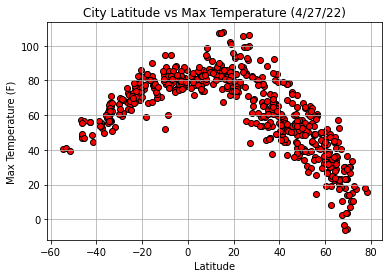

In [10]:
x_values = weather_data_df['Lat']
y_values = weather_data_df['Max Temp']
plt.scatter(x_values,y_values, marker="o", facecolors="r", edgecolors="black")
plt.title('City Latitude vs Max Temperature (4/27/22)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("../Images/Latitude_vs_Temperature_Plot.png")
plt.show()

Temperatures for the cities in the dataframe are higher at or around the equator (0 degrees latitude). As we move (+) or (-) in relation to the equator, temperatures increase or decrease accordingly.

## Latitude vs. Humidity Plot

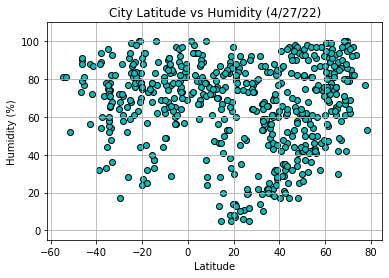

In [11]:
x_values = weather_data_df['Lat']
y_values = weather_data_df['Humidity']
plt.scatter(x_values,y_values, marker="o", facecolors="c", edgecolors="black")
plt.title('City Latitude vs Humidity (4/27/22)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(-5, 110)
plt.grid()
plt.savefig("../Images/Latitude_vs_Humidity_Plot.png")
plt.show()

The generated plot reflects a weak relationship between humidity and a city's latitude.

## Latitude vs. Cloudiness Plot

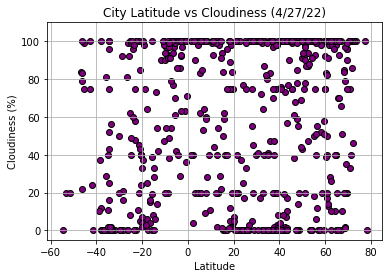

In [12]:
x_values = weather_data_df['Lat']
y_values = weather_data_df['Cloudiness']
plt.scatter(x_values,y_values, marker="o", facecolors="purple", edgecolors="black")
plt.title('City Latitude vs Cloudiness (4/27/22)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 110)
plt.grid()
plt.savefig("../Images/Latitude_vs_Cloudiness_Plot.png")
plt.show()

The generated plot reflects a weak relationship between cloudiness and a city's latitude.

## Latitude vs. Wind Speed Plot

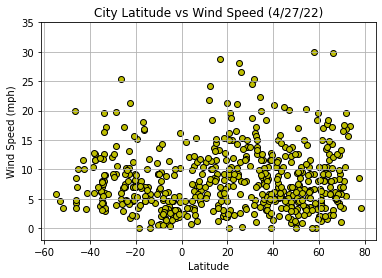

In [13]:
x_values = weather_data_df['Lat']
y_values = weather_data_df['Wind Speed']
plt.scatter(x_values,y_values, marker="o", facecolors="y", edgecolors="black")
plt.title('City Latitude vs Wind Speed (4/27/22)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(-2, 35)
plt.grid()
plt.savefig("../Images/Latitude_vs_WindSpeed_Plot.png")
plt.show()

The generated plot reflects a weak relationship between wind speed and a city's latitude.

## Linear Regression

In [14]:
from scipy.stats import linregress

# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data_df.loc[weather_data_df["Lat"] >= 0]
southern_hemisphere = weather_data_df.loc[weather_data_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7401363396906074


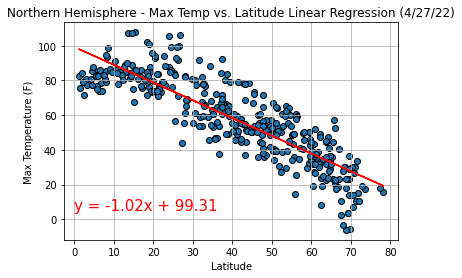

In [15]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15, color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression (4/27/22)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NH_Latitude_vs_Temp_Linear_Reg.png")
plt.show()

A strong negative correlation exists between temperature and its relationship to the equator. As the latitude increases in the northern hemisphere, the temperature decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7098700302466717


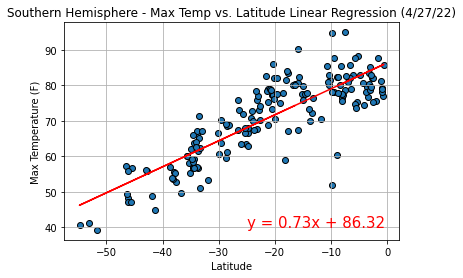

In [17]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15, color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression (4/27/22)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SH_Latitude_vs_Temp_Linear_Reg.png")
plt.show()

A positive correlation exists between temperature and its relationship to the equator. As the latitude approaches the equator in the southern hemisphere, the temperature increases. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.018693811065467168


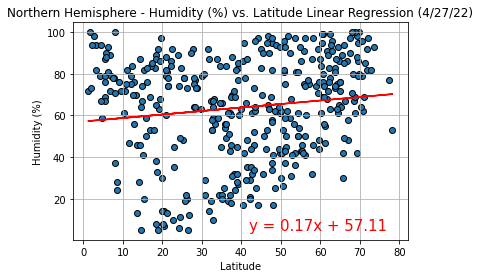

In [18]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,5),fontsize=15, color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (4/27/22)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NH_Latitude_vs_Humidity_Linear_Reg.png")
plt.show()

A weak correlation exists between humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005906187268864783


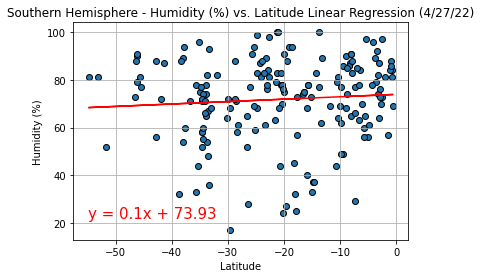

In [19]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15, color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (4/27/22)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SH_Latitude_vs_Humidity_Linear_Reg.png")
plt.show()

A weak correlation exists between humidity and latitude in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.015013847100588293


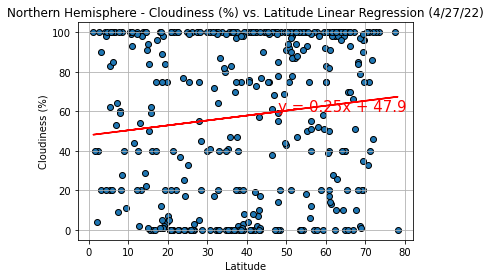

In [21]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,60),fontsize=15, color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (4/27/22)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NH_Latitude_vs_Cloudiness_Linear_Reg.png")
plt.show()

A weak correlation exists between cloudiness and latitude in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16518239069751836


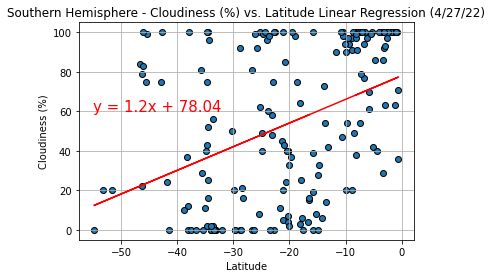

In [22]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15, color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (4/27/22)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SH_Latitude_vs_Cloudiness_Linear_Reg.png")
plt.show()

A weak correlation exists between cloudiness and latitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0017310336125286394


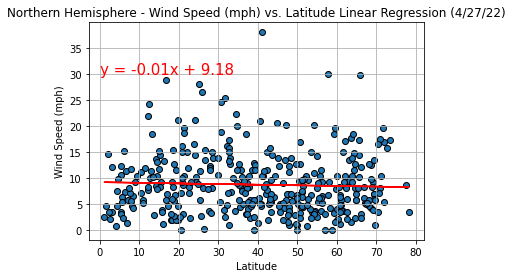

In [23]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15, color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (4/27/22)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/NH_Latitude_vs_Wind_Linear_Reg.png")
plt.show()

A weak correlation exists between wind speed and latitude in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07619154117628586


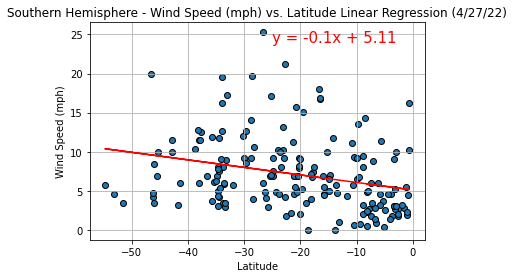

In [24]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,24),fontsize=15, color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (4/27/22)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/SH_Latitude_vs_Wind_Linear_Reg.png")
plt.show()

A weak correlation exists between wind speed and latitude in the southern hemisphere.